In [10]:
%pylab
%matplotlib inline
import numpy as np

Using matplotlib backend: TkAgg
Populating the interactive namespace from numpy and matplotlib


D:\anaconda\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['time']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [11]:
t0 = 0 
t1 = 20000
nt = 28001
dt = (t1-t0)/(nt-1)
w0 = 0.057
w1 = 0.114
Up0 = 0.58 + 3.17 * 0.08 **2 /(4 * w0**2)
Up0  

2.1410957217605415

In [41]:
data = loadtxt('./HHG_0_0.dat' )
time, Ex, Ey, Ax, Ay, Dx, Dy, intA1x, intA1y = data [:, 0], data[:, 1], data[:, 2], data[:, 3], data[:, 4], data[:, 5], data[:, 6], data[:, 7], data[:, 8]

In [42]:
data1 = loadtxt('../HHG_LBY/sfa-mono/data.dat')
time1, Ex1, Ax1, intA1, D_real, D_imag = data1[:,0], data1[:,1], data1[:,2], data1[:,3], data1[:,4], data1[:,5]

$ phi = w(t-tc+duration/2) \\
A = A_0sin^2(\dfrac{phi}{2nc})sin(phi) \\
E = -A_0(\dfrac{w}{nc}sin(\dfrac{phi}{2nc})cos(\dfrac{phi}{2nc})sin(phi)+w\times sin^2(\dfrac{phi}{2nc})cos(phi))  \\
E = -A_0(\dfrac{w}{2nc}2sin(\dfrac{phi}{2nc})cos(\dfrac{phi}{2nc})sin(phi)+w\times sin^2(\dfrac{phi}{2nc})cos(phi))  \\
E = -A_0(\dfrac{w}{2nc}sin(\dfrac{phi}{nc})sin(phi)+w\times sin^2(\dfrac{phi}{2nc})cos(phi))  \\
$

[10.0236 10.167  10.293  10.4015 10.4923] [0. 0. 0. 0. 0.]


(12000, 16000)

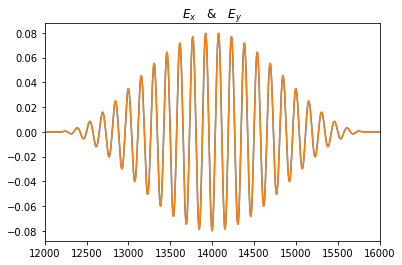

In [44]:
# figure(figsize=(12,7))
plot(Ey)
plot(Ex1)
print(intA1[14995:15000],intA1x[14995:15000])
title('$E_x \quad & \quad E_y$')
# plot(Ex,Ey)
# plot(Ax,Ay)
xlim(12000,16000)

Text(0.5, 1.0, '$D_x \\quad & \\quad D_y$')

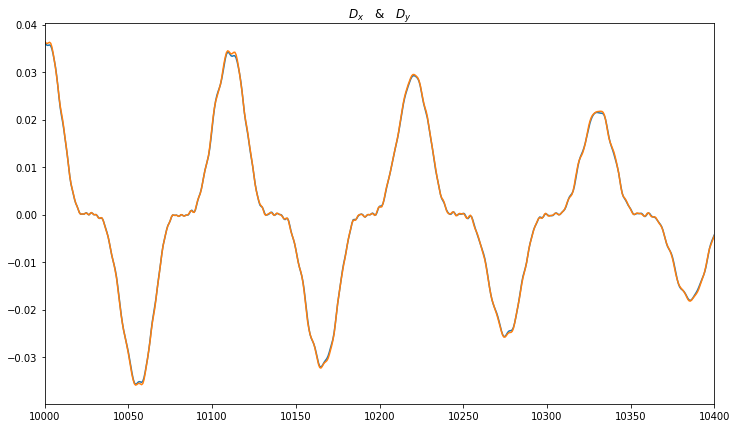

In [46]:
figure(figsize=(12,7))
plot(time, Dy)
plot(time1, D_real)
xlim(10000,10400)
title('$D_x \quad & \quad D_y$')

(-600, 50)

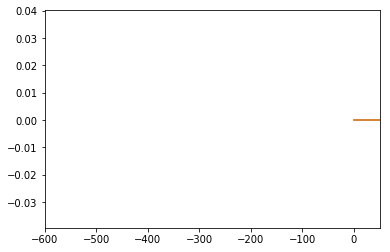

In [47]:
plot(time, Dx)
plot(time, Dy)
xlim(-600,50)

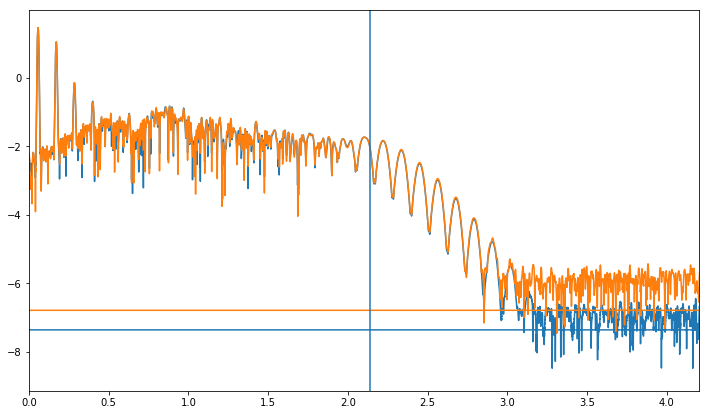

In [49]:
figure(figsize=(12,7))
frex = fft.fft(2 * Dy)
frey = fft.fft(2 * D_real)
w = 2* pi* fft.fftfreq(len(time), dt)
plot(w, log10(abs(frex)))
plot(w, log10(abs(frey)))
xlim(0,4.2)
axvline(Up0)

In [50]:
mul=16*Dx.size
Dx_ext = np.pad(Dx, (mul, mul), 'constant')
Dy_ext = np.pad(Dy, (mul, mul), 'constant')
time_ext = np.pad(time,(mul,mul), 'constant')
Dx_thz = zeros(Dx.size, complex)
Dy_thz = zeros(Dy.size, complex)
con_1=int(0.0151992/(2*pi*(1/(len(time)*dt)))+1)
con_2=int(0.0151992/(2*pi*(1/(len(time)*dt))))
print(con_1,frex)
Dx_thz[0:con_1]=frex[0:con_1]
Dy_thz[0:con_1]=frey[0:con_1]
Dx_thz[(frex.size-con_2):frex.size]=frex[(frex.size-con_2):Dx.size]
Dy_thz[(frex.size-con_2):frex.size]=frey[(frex.size-con_2):Dx.size]
sx=ifft(Dx_thz)
sy=ifft(Dy_thz)

49 [ 0.00564793+0.00000000e+00j -0.00563127+4.28839795e-05j
  0.005582  -8.32292090e-05j ... -0.00550033-1.18552265e-04j
  0.005582  +8.32292090e-05j -0.00563127-4.28839795e-05j]


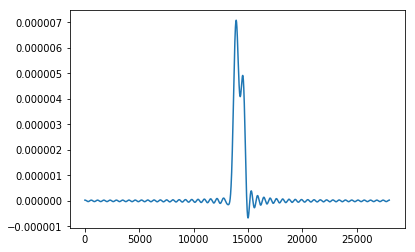

In [51]:
plot(sy)

In [52]:
Dx_1=zeros(Dx.size)
Dy_1=zeros(Dy.size)
Dx_1[Dx.size-1]=((Dx[Dx.size-1]-Dx[Dx.size-2])/dt)
Dy_1[Dy.size-1]=((Dy[Dy.size-1]-Dy[Dy.size-2])/dt)
for m in range(Dx.size-1):
    Dx_1[m]=((Dx[m+1]-Dx[m])/dt)
    Dy_1[m]=((Dy[m+1]-Dy[m])/dt)
#
Dx_2=zeros(Dx.size)
Dy_2=zeros(Dy.size)
Dx_2[Dx.size-1]=((Dx_1[Dx.size-1]-Dx_1[Dx.size-2])/dt)
Dy_2[Dy.size-1]=((Dy_1[Dy.size-1]-Dy_1[Dy.size-2])/dt)
for n in range(Dx.size-1):
    Dx_2[n]=((Dx_1[n+1]-Dx_1[n])/dt)
    Dy_2[n]=((Dy_1[n+1]-Dy_1[n])/dt)

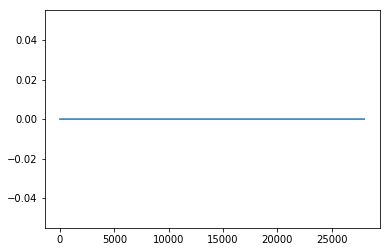

In [53]:
plot(Dx_2)

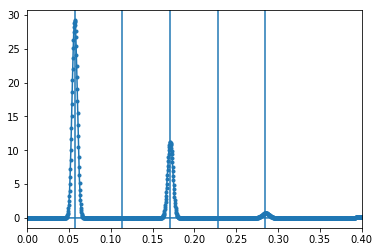

In [54]:
plot(w, (abs(frex)), '.-')
# plot(w, (abs(frey)), '.-')
xlim(0,0.4)
axvline(0.057)
axvline(0.114)
axvline(0.171)
axvline(0.228)
axvline(0.285)

(77.5, 86)

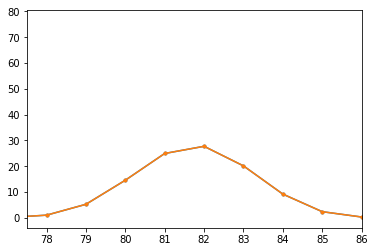

In [53]:
plot(abs(frex), '.-')
plot(abs(frey), '.-')
xlim(77.5,86)
#xlim(0,100)

$A= A_0sin^2(w\frac{t}{2nc})cos(wt)$

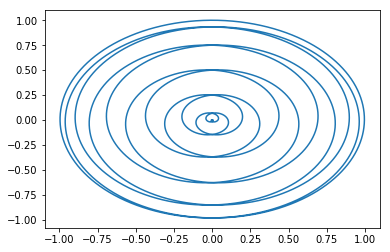

In [45]:
t = np.linspace(0,75,28000)
x = np.sin(t/24)*np.sin(t/24)*np.sin(t)
y = np.sin(t/24)*np.sin(t/24)*np.cos(t)
# plot(t,x)
# plot(t,y)2111111111111111111111111111111111111111111111111111111111111111111111111
plot(x,y)